<a href="https://colab.research.google.com/github/meghmodi2810/Machine-Learning-Projects/blob/main/DecisionTreeClassifierScikitLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
%matplotlib inline

In [98]:
df = pd.read_csv("sample_data/computer_purchase.csv")

In [99]:
X = pd.get_dummies(df.drop('Buy_Computer', axis=1))
y = computer_data['Buy_Computer']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
classifier = DecisionTreeClassifier(max_depth = 3, criterion = "gini", random_state = 42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [103]:
tree_rules = export_text(classifier, feature_names=list(X.columns))
print(tree_rules)

|--- Age_Middle_aged <= 0.50
|   |--- Student_Yes <= 0.50
|   |   |--- Age_Senior <= 0.50
|   |   |   |--- class: No
|   |   |--- Age_Senior >  0.50
|   |   |   |--- class: No
|   |--- Student_Yes >  0.50
|   |   |--- Credit_rating_Fair <= 0.50
|   |   |   |--- class: No
|   |   |--- Credit_rating_Fair >  0.50
|   |   |   |--- class: Yes
|--- Age_Middle_aged >  0.50
|   |--- class: Yes



In [105]:
y_pred = classifier.predict(X_test)

In [106]:
print("Accuracy Score :", accuracy_score(y_test, y_pred))

Accuracy Score : 1.0


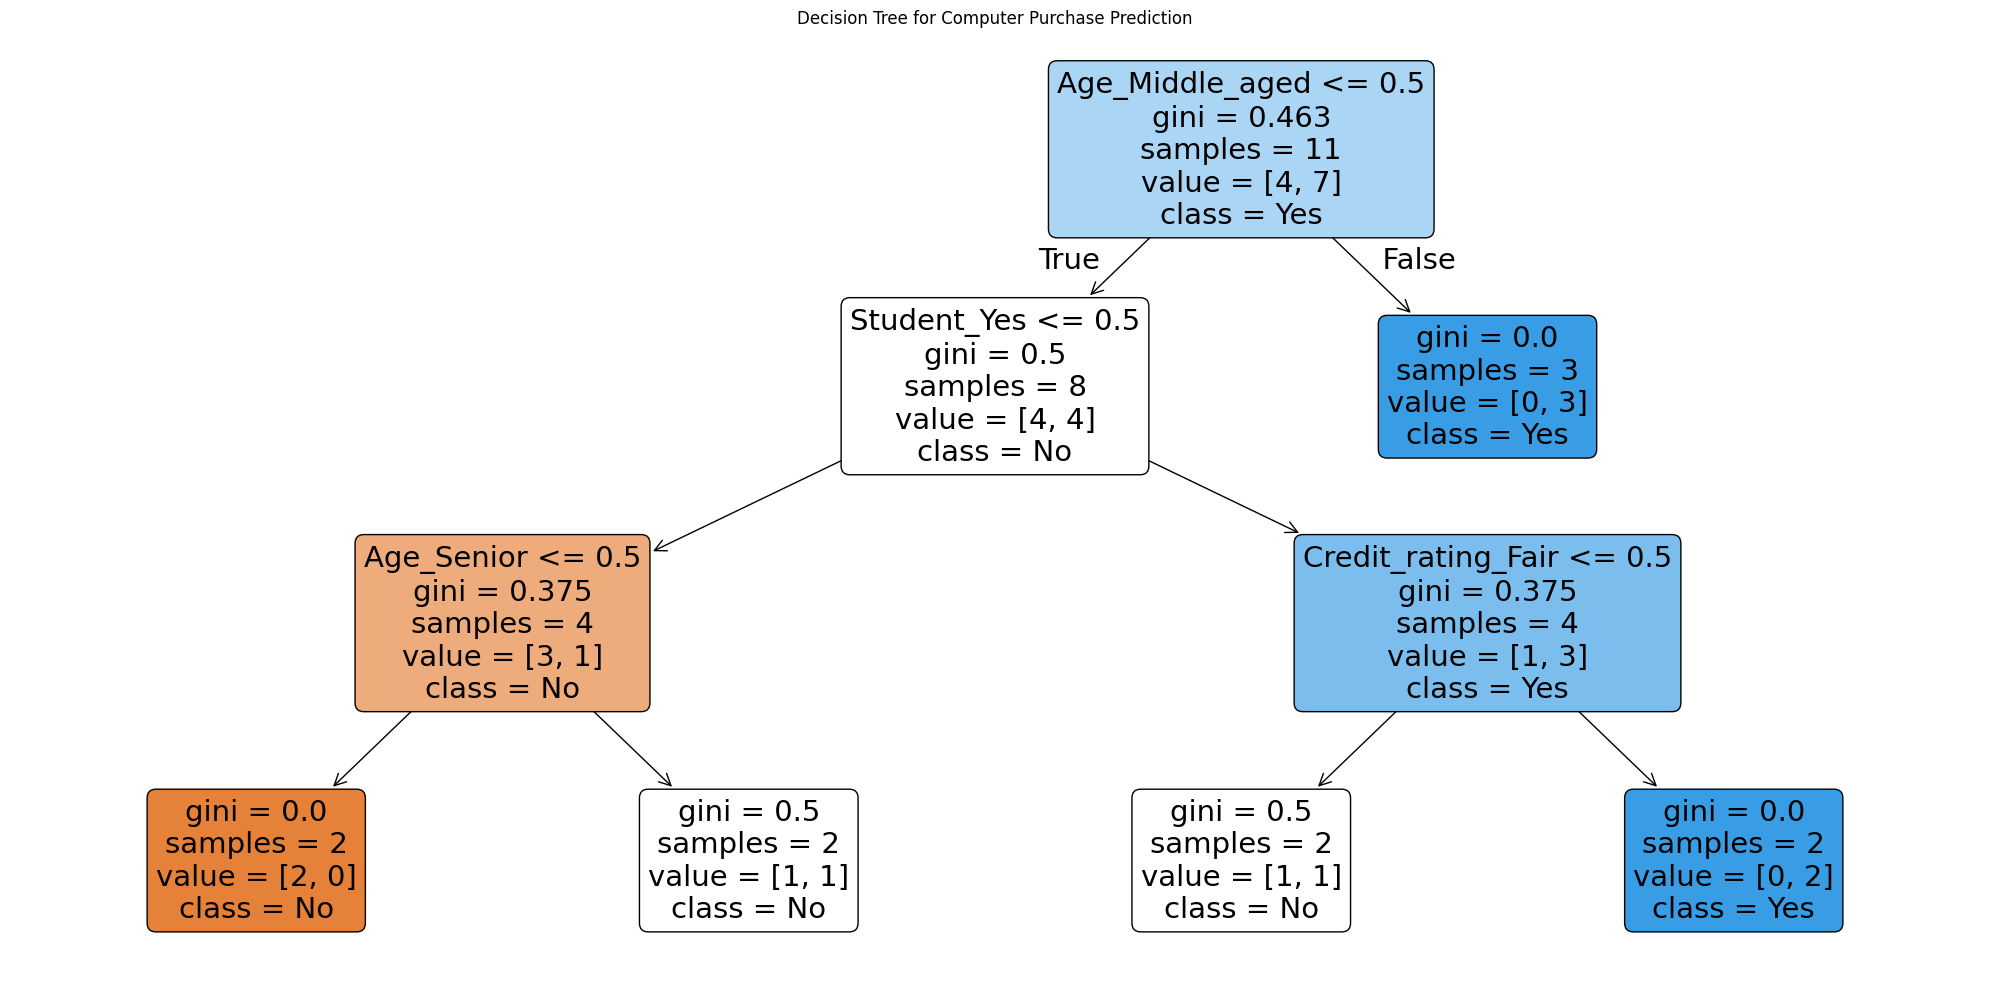

In [108]:
plt.figure(figsize=(20, 10))
plot_tree(classifier,
          filled=True,
          feature_names=X.columns,
          class_names=classifier.classes_,
          rounded=True)
plt.title("Decision Tree for Computer Purchase Prediction")
plt.tight_layout()
plt.show()